In [1]:
# imports
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# Settings for displaying floats
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
df = pd.read_csv("/Users/mareikekeller/air_quality/data/cleaned_data.csv")
df.head()

,Date,Country,City,aqi,co,d,dew,humidity,mepaqi,no2,...,pol,precipitation,pressure,psi,so2,temperature,uvi,wd,wind-gust,wind-speed
0,2014-12-29,AT,Vienna,NaN,0.10,NaN,NaN,NaN,NaN,9.00,...,NaN,NaN,NaN,NaN,2.60,NaN,NaN,NaN,NaN,NaN
1,2014-12-29,AU,Brisbane,NaN,1.90,NaN,NaN,NaN,NaN,4.60,...,NaN,NaN,NaN,NaN,1.10,NaN,NaN,NaN,NaN,NaN
2,2014-12-29,BE,Brussels,NaN,0.10,NaN,NaN,NaN,NaN,23.40,...,NaN,NaN,NaN,NaN,1.60,NaN,NaN,NaN,NaN,NaN
3,2014-12-29,BO,Cochabamba,NaN,NaN,NaN,NaN,NaN,NaN,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-29,BR,São Paulo,NaN,5.50,NaN,NaN,NaN,NaN,17.90,...,NaN,NaN,NaN,NaN,1.10,NaN,NaN,NaN,NaN,NaN


In [4]:
df["City"].nunique()

95

In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Split 'Date' column into 'year', 'month' and 'day'
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Remove 'Date' column
if 'Date' in df.columns:
    df.drop(columns=['Date'], inplace=True)

In [6]:
# Daten für 2014 & 2025 entfernen, weil zu wenige Datenpunkte
df = df[(df["year"] > 2014) & (df["year"] < 2025)]

In [7]:
# Display the first 5 rows of the dataframe
df.head()

,Country,City,aqi,co,d,dew,humidity,mepaqi,no2,o3,...,psi,so2,temperature,uvi,wd,wind-gust,wind-speed,year,month,day
139,AT,Vienna,NaN,0.10,NaN,NaN,NaN,NaN,7.80,NaN,...,NaN,2.60,NaN,NaN,NaN,NaN,NaN,2015,1,1
140,AU,Brisbane,NaN,1.90,NaN,NaN,NaN,NaN,1.90,4.90,...,NaN,1.10,NaN,NaN,NaN,NaN,NaN,2015,1,1
141,BE,Brussels,NaN,0.10,NaN,NaN,NaN,NaN,12.40,16.30,...,NaN,1.60,NaN,NaN,NaN,NaN,NaN,2015,1,1
142,BO,Cochabamba,NaN,NaN,NaN,NaN,NaN,NaN,4.30,10.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1
143,BR,São Paulo,NaN,4.60,NaN,NaN,NaN,NaN,7.40,19.50,...,NaN,1.10,NaN,NaN,NaN,NaN,NaN,2015,1,1


In [8]:
df.shape

(221275, 26)

In [9]:
# Berechnen, wie viele Prozent der Werte pro Spalte fehlen
missing_percent = df.isna().mean() * 100  

# Spalten auswählen, die weniger als 50% fehlende Werte haben
df_cleaned = df.loc[:, missing_percent <= 53]

# Ergebnis ausgeben
print(f"Anzahl der entfernten Spalten: {df.shape[1] - df_cleaned.shape[1]}")
print("Übrige Spalten:", df_cleaned.columns)


Anzahl der entfernten Spalten: 10
Übrige Spalten: Index(['Country', 'City', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25',
       'pressure', 'so2', 'temperature', 'wind-speed', 'year', 'month', 'day'],
      dtype='object')


In [10]:
df_cleaned["City"].nunique()

95

Text(0.5, 1.0, 'Heatmap der fehlenden Werte pro Stadt und Schadstoff')

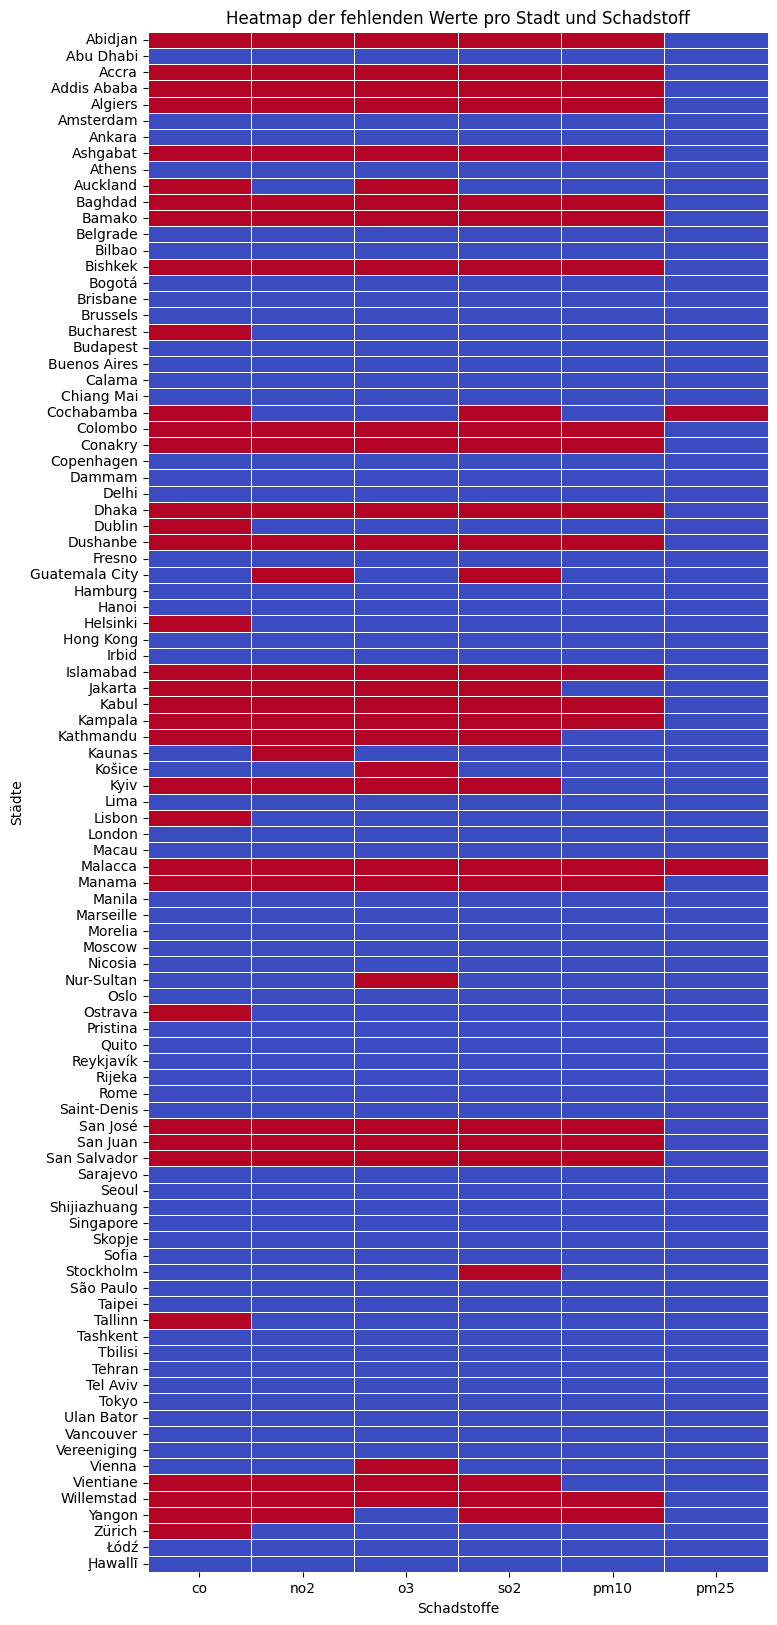

In [32]:
# Mit Heatmap herausfinden, welche Städte für welche Schadstoffe fehlende Werte haben

# DataFrame mit den Schadstoffen pro Stadt erstellen
df_missing = df_cleaned.groupby("City")[pollutants].mean()

# Boolean-Maske für fehlende Werte erstellen (True = fehlend, False = vorhanden)
missing_data = df_missing.isna()

# Größe der Grafik anpassen
plt.figure(figsize=(8, 20))

# Heatmap zeichnen (dunklere Farben = mehr fehlende Werte)
sns.heatmap(missing_data, cmap="coolwarm", cbar=False, linewidths=0.5)

# Achsentitel setzen
plt.xlabel("Schadstoffe")
plt.ylabel("Städte")
plt.title("Heatmap der fehlenden Werte pro Stadt und Schadstoff")


In [40]:
missing_per_city = df_missing.isna().sum(axis=1)
missing_per_city_sorted = missing_per_city.sort_values(ascending=False)
print(missing_per_city_sorted.to_string())


City
Malacca           6
Abidjan           5
Bishkek           5
San José          5
San Juan          5
San Salvador      5
Manama            5
Kampala           5
Kabul             5
Islamabad         5
Dhaka             5
Conakry           5
Colombo           5
Dushanbe          5
Bamako            5
Ashgabat          5
Baghdad           5
Accra             5
Addis Ababa       5
Algiers           5
Willemstad        5
Vientiane         4
Kathmandu         4
Yangon            4
Jakarta           4
Kyiv              4
Cochabamba        3
Guatemala City    2
Auckland          2
Vienna            1
Košice            1
Kaunas            1
Ostrava           1
Bucharest         1
Nur-Sultan        1
Helsinki          1
Stockholm         1
Zürich            1
Lisbon            1
Tallinn           1
Dublin            1
Sarajevo          0
Shijiazhuang      0
Seoul             0
Łódź              0
Rome              0
Saint-Denis       0
Skopje            0
Singapore         0
Sofia          

In [28]:
# Clusteranalyse zur Schadstoffbelastung

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Liste der Schadstoff-Features für das Clustering
pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]

# Durchschnittliche Schadstoffwerte pro Stadt berechnen
df_cluster = df_cleaned.groupby("City")[pollutants].mean().dropna(thresh=2)



In [29]:
df_cluster.head()

,co,no2,o3,so2,pm10,pm25
City,,,,,,
Abu Dhabi,0.10,12.10,27.64,4.96,80.03,98.72
Amsterdam,2.86,10.22,19.80,0.40,15.90,39.81
Ankara,9.02,20.80,13.28,4.07,37.77,59.94
Athens,0.10,11.67,29.59,3.64,24.26,52.64
Auckland,NaN,2.95,NaN,1.08,11.74,27.53


In [30]:
df_cluster.shape

(74, 6)

In [ ]:
df_cluster

,Country,City,aqi,co,d,dew,humidity,mepaqi,no2,o3,...,psi,so2,temperature,uvi,wd,wind-gust,wind-speed,year,month,day
139,AT,Vienna,NaN,0.10,NaN,NaN,NaN,NaN,7.80,NaN,...,NaN,2.60,NaN,NaN,NaN,NaN,NaN,2015,1,1
140,AU,Brisbane,NaN,1.90,NaN,NaN,NaN,NaN,1.90,4.90,...,NaN,1.10,NaN,NaN,NaN,NaN,NaN,2015,1,1
141,BE,Brussels,NaN,0.10,NaN,NaN,NaN,NaN,12.40,16.30,...,NaN,1.60,NaN,NaN,NaN,NaN,NaN,2015,1,1
142,BO,Cochabamba,NaN,NaN,NaN,NaN,NaN,NaN,4.30,10.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1
143,BR,São Paulo,NaN,4.60,NaN,NaN,NaN,NaN,7.40,19.50,...,NaN,1.10,NaN,NaN,NaN,NaN,NaN,2015,1,1


In [9]:
# Daten skalieren (K-Means ist empfindlich gegenüber unterschiedlichen Skalen)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Ergebnis als DataFrame zurückgeben
df_cluster_scaled = pd.DataFrame(df_scaled, index=df_cluster.index, columns=pollutants)

# Überprüfen, ob die Daten korrekt vorbereitet sind
df_cluster_scaled.head()

,co,no2,o3,so2,pm10,pm25
City,,,,,,
Abu Dhabi,-1.00,0.14,1.35,0.36,2.31,1.40
Amsterdam,-0.39,-0.13,0.30,-0.93,-0.71,-0.75
Ankara,0.96,1.38,-0.58,0.11,0.32,-0.02
Athens,-1.00,0.08,1.62,-0.01,-0.32,-0.28
Belgrade,0.02,0.05,-0.07,0.66,-0.30,0.06


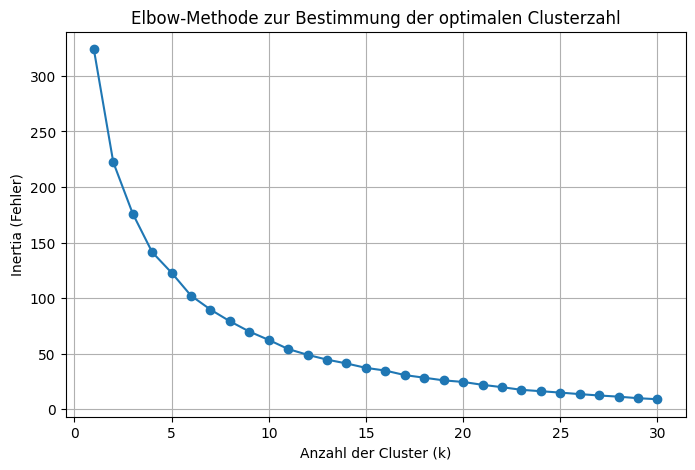

In [10]:
# Teste verschiedene Clusterzahlen (k = 1 bis 10)
inertia = []
k_values = range(1, 31)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)  # Speichert den Fehler (Inertia)

# Elbow-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Inertia (Fehler)")
plt.title("Elbow-Methode zur Bestimmung der optimalen Clusterzahl")
plt.grid(True);

In [11]:
# K-Means-Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster_scaled["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

# Neue Cluster-Zuordnung der Städte anzeigen
df_clusters_no_outliers = df_cluster_scaled[["Cluster"]].sort_values(by="Cluster")
df_clusters_no_outliers

,Cluster
City,
Ankara,0
Tel Aviv,0
Taipei,0
Seoul,0
Quito,0
Manila,0
Macau,0
Hong Kong,0
Abu Dhabi,1


In [17]:
df_clusters_no_outliers.shape

(54, 1)

Entscheidung: 5 Cluster sind gut - aber Teheran it so dreckig, dass es allein sein eigens Cluster bildet. Also nehmen wir es erst mal raus, damit es die anderen Cluster nicht verzerrt. Dadurch nehmen wir für die Clusteranalyse aber nur noch 4 Cluster.

In [12]:
# Teheran aus dem DataFrame entfernen
df_cluster_no_tehran = df_cluster_scaled.drop(index="Tehran")

# K-Means erneut ausführen mit 4 Clustern (oder einer anderen optimalen Zahl)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster_no_tehran["Cluster"] = kmeans.fit_predict(df_cluster_no_tehran)

# Neue Cluster-Zugehörigkeit der Städte anzeigen
df_clusters_no_tehran = df_cluster_no_tehran[["Cluster"]]
df_clusters_no_tehran_sorted = df_clusters_no_tehran.sort_values(by="Cluster")  # Sortiert nach Cluster
df_clusters_no_tehran_sorted

,Cluster
City,
Macau,0
Ankara,0
Taipei,0
Tel Aviv,0
Manila,0
Seoul,0
Hong Kong,0
Quito,0
Irbid,1


In [16]:
df_clusters_no_tehran_sorted.shape

(53, 1)

In [13]:
type(df_clusters_no_tehran_sorted)

pandas.core.frame.DataFrame

In [15]:
# Cluster-Labels zu df_cluster hinzufügen
df_clusters_no_tehran_sorted["Cluster"] = kmeans.labels_

# Merge mit ursprünglichem DataFrame
df = df.merge(df_clusters_no_tehran_sorted[["Cluster"]], left_on="City", right_index=True, how="left")

# Überprüfen, ob die Cluster-Zuordnung funktioniert hat
df.head(20)


,Country,City,aqi,co,d,dew,humidity,mepaqi,no2,o3,...,temperature,uvi,wd,wind-gust,wind-speed,year,month,day,Cluster_x,Cluster_y
139,AT,Vienna,NaN,0.10,NaN,NaN,NaN,NaN,7.80,NaN,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,NaN,NaN
140,AU,Brisbane,NaN,1.90,NaN,NaN,NaN,NaN,1.90,4.90,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,1.00,1.00
141,BE,Brussels,NaN,0.10,NaN,NaN,NaN,NaN,12.40,16.30,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,0.00,0.00
142,BO,Cochabamba,NaN,NaN,NaN,NaN,NaN,NaN,4.30,10.90,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,NaN,NaN
143,BR,São Paulo,NaN,4.60,NaN,NaN,NaN,NaN,7.40,19.50,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,1.00,1.00
144,CA,London,NaN,NaN,NaN,NaN,NaN,NaN,3.80,20.00,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,1.00,1.00
145,CA,Vancouver,NaN,0.10,NaN,NaN,NaN,NaN,7.70,1.70,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,2.00,2.00
146,CH,Zürich,NaN,NaN,NaN,NaN,NaN,NaN,22.00,8.70,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,NaN,NaN
147,CL,Calama,NaN,4.20,NaN,NaN,NaN,NaN,NaN,17.80,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,0.00,0.00
148,CN,Shijiazhuang,NaN,22.70,NaN,NaN,NaN,NaN,36.60,3.70,...,NaN,NaN,NaN,NaN,NaN,2015,1,1,2.00,2.00
